In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from PhyPraKit import readPicoScope, resample
from scipy import signal
from scipy import interpolate
import sys
from kafe2 import  XYContainer, Fit, XYFit, Plot, ContoursProfiler                            
from uncertainties import ufloat, unumpy
from math import log10, floor
import scipy.integrate as integrate
import pandas as pd
import csv

Welcome to JupyROOT 6.24/06


In [2]:
### Aufgabe 1

In [3]:
U_Sp=(6.15+6.103)/2
U_W=(4.378+4.354)/2
Fasen_verschie=2.83*10**(-3)
R= 10
w=2*np.pi*50
f=50

In [4]:
L1=U_Sp/U_W*R/w*np.sin(Fasen_verschie*2*np.pi*f)
r1=U_Sp/U_W*R*np.cos(Fasen_verschie*2*np.pi*f)
print('bei 303,3mA L:',L1)
print('bei 303,3mA r:',r1)

bei 303,3mA L: 0.03468268810226373
bei 303,3mA r: 8.842224374294924


In [5]:
U_Sp=((631.5+631.5)/2)*10**(-3)
U_W=((448.4+444.8)/2)*10**(-3)
Fasen_verschie=2.83*10**(-3)
R= 10
w=2*np.pi*50
f=50

In [6]:
L2=U_Sp/U_W*R/w*np.sin(Fasen_verschie*2*np.pi*f)
r2=U_Sp/U_W*R*np.cos(Fasen_verschie*2*np.pi*f)
print('bei 31mA L:',L2)
print('bei 31mA r:',r2)
L=np.append(L1,L2)
r=np.append(r1,r2)
print('mittleres L:',np.mean(L),'pm',np.sqrt(np.var(L)))
print('mittleres r:',np.mean(r),'pm',np.sqrt(np.var(r)))

bei 31mA L: 0.03494931596294642
bei 31mA r: 8.91020017137395
mittleres L: 0.03481600203260507 pm 0.00013331393034134512
mittleres r: 8.876212272834437 pm 0.033987898539512784


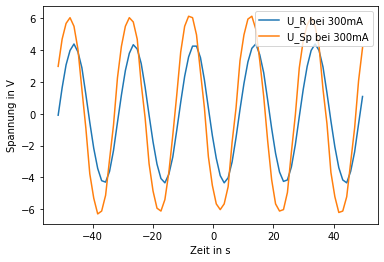

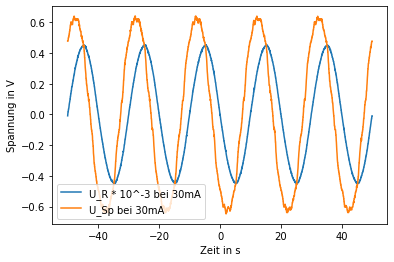

In [7]:
data=pd.read_csv('Werte/Aufgabe1.1_300mA/Aufgabe1_1_01.csv',delimiter=';',decimal=",",skiprows=1) #importiere Daten
data.columns=['t','U_Sp', 'U_R']
t = data['t'].to_numpy() 
U_Sp300mA = data['U_Sp'].to_numpy() 
U_R300mA = data['U_R'].to_numpy() 


plt.plot(t,U_R300mA,label = 'U_R bei 300mA')
plt.plot(t,U_Sp300mA,label = 'U_Sp bei 300mA')
plt.xlabel('Zeit in s')
plt.ylabel('Spannung in V')
plt.legend()
plt.savefig('Aufgabe1_300mA.png')
plt.show()

data=pd.read_csv('Werte/Aufgabe1_1_30mA.csv',delimiter=';',decimal=",",skiprows=1) #importiere Daten
data.columns=['t','U_Sp', 'U_R']
t = data['t'].to_numpy() 
U_Sp30mA = data['U_Sp'].to_numpy()
U_R30mA = data['U_R'].to_numpy() /1000



plt.plot(t,U_R30mA,label = 'U_R * 10^-3 bei 30mA')
plt.plot(t,U_Sp30mA,label = 'U_Sp bei 30mA')
plt.xlabel('Zeit in s')
plt.ylabel('Spannung in V')
plt.legend()
plt.savefig('Aufgabe1_30mA.png')
plt.show()

In [8]:
#Aufgabe 3

H 31.710763453
B 0.050026347750000005
mu1: 1255.4003832641718
H 65.114645649
B 0.18027216649999997
mu2: 2203.1301496831197


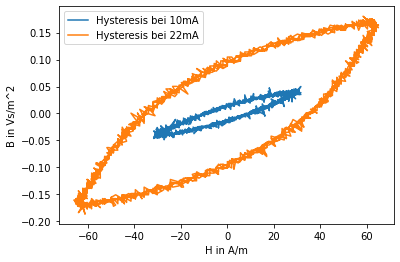

In [9]:
y0 = 1.256637*10**(-6)
data=pd.read_csv('Werte/Aufgabe3_1_10mA.csv',delimiter=';',decimal=",",skiprows=1) #importiere Daten
data.columns=['f','U_R', 'U_RC']
U_R10mA = data['U_R'].to_numpy() /1000
U_RC10mA = data['U_RC'].to_numpy() / 1000
data=pd.read_csv('Werte/Aufgabe3_1_22mA/Aufgabe3_1_22mA_01.csv',delimiter=';',decimal=",",skiprows=1) #importiere Daten
data.columns=['f','U_R', 'U_RC']
U_R22mA = data['U_R'].to_numpy() / 1000
U_RC22mA = data['U_RC'].to_numpy() /1000
U_R10mA = U_R10mA * 208.33
U_RC10mA = U_RC10mA * 1.315
print('H',max(U_R10mA))
print('B',max(U_RC10mA))
print('mu1:',max(U_RC10mA)/(max(U_R10mA)*y0))
plt.plot(U_R10mA,U_RC10mA,label = 'Hysteresis bei 10mA')

U_R22mA = U_R22mA * 208.33
U_RC22mA = U_RC22mA * 1.315
print('H',max(U_R22mA))
print('B',max(U_RC22mA))
print('mu2:',max(U_RC22mA)/(max(U_R22mA)*y0))
plt.plot(U_R22mA,U_RC22mA,label= 'Hysteresis bei 22mA')
plt.xlabel('H in A/m')
plt.ylabel('B in Vs/m^2')
plt.legend()
plt.savefig('Aufgabe3Hysteresenkorr.png')
plt.show()

In [10]:
reader = csv.reader(open("Werte/Aufgabe3_1_10mA.csv", "r"), delimiter=';')
writer = csv.writer(open("output.csv", 'w'), delimiter=',')
writer.writerows(reader)

In [11]:
# Aufgabe 4

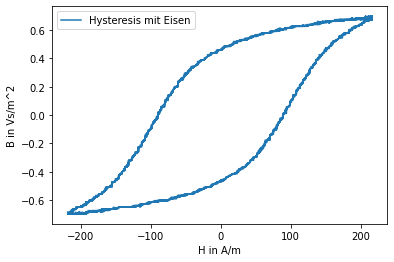

0.698213715
216.40189626900002
0.4615964285
89.377344648


In [12]:
###### import numpy as np

def conv(x):
    return x.replace(',', '.').encode()

data = np.genfromtxt((conv(x) for x in open("Werte/Aufgabe4_Eisen_259mA.csv")), delimiter=';',skip_header=2)
f = data[:,0]
U_REisen = data[:,1]
U_RCEisen = data[:,2]
U_REisen = U_REisen * 52.083
U_RCEisen = U_RCEisen * 1.315
plt.plot(U_REisen,U_RCEisen,label = 'Hysteresis mit Eisen')
plt.xlabel('H in A/m')
plt.ylabel('B in Vs/m^2')
plt.legend()
plt.savefig('Aufgabe4HystereseEisen.png')
plt.show()
print(max(U_RCEisen))
print(max(U_REisen))
print(0.35102390*1.315)
print(1.71605600*52.083)

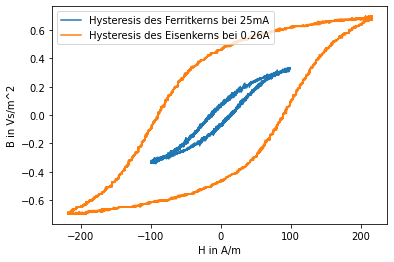

0.33510784000000005
99.206853174
0.05775606400000001
10.7250654654


In [13]:
import numpy as np

def conv(x):
    return x.replace(',', '.').encode()

data = np.genfromtxt((conv(x) for x in open("Werte/Aufgabe4_Ferrit_25_58mA.csv")), delimiter=';',skip_header=2)
f = data[:,0]*10**(-3)
U_RFerrit = data[:,1]*10**(-3)
U_RCFerrit = data[:,2]*10**(-3)
U_RFerrit = U_RFerrit * 238.095
U_RCFerrit = U_RCFerrit * 3.2
plt.plot(U_RFerrit,U_RCFerrit,label = 'Hysteresis des Ferritkerns bei 25mA')
plt.plot(U_REisen,U_RCEisen,label = 'Hysteresis des Eisenkerns bei 0.26A')
plt.xlabel('H in A/m')
plt.ylabel('B in Vs/m^2')
plt.legend()
plt.savefig('Aufgabe4Hysteresenkorr(2).png')
plt.show()
print(max(U_RCFerrit))
print(max(U_RFerrit))
print(18.04877000*10**(-3)*3.2)
print(45.04532000*238.095*10**(-3))